In [1]:
from pathlib import Path
data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle/")
session_list = [6,10,11,13,17,19,20,21,22,23,28,29,30]
obj_ref_frame = [500,180,380,849,459, 59, 842, 24, 93, 176, 2626, 595, 241 ]
prefix = "240905-1616"
skeleton_toml_path = "skeleton.toml"

In [2]:
experiment =6
session = session_list[experiment]
obj_ref = obj_ref_frame[experiment]

In [3]:
from scripts.tools.ground_truth_toml_reader import GroundTruth
from src.loader import InstanceLoader

gt = GroundTruth(data_folder, prefix, session)
track_list = gt["tracks"]


# Load the experiment
t = InstanceLoader(data_folder=data_folder,
                   session_number=session,
                   skeleton_toml_path=skeleton_toml_path,
                   obj_ref_frame=obj_ref,
                   prefix=prefix)


In [4]:
from scripts.tools.estimate_ground_plane import GroundPlaneEstimation
g = GroundPlaneEstimation(t.animal_list, node_list=['leg_m_L2', 'leg_m_R2', 'leg_f_L2', 'leg_f_R2'])


In [7]:
g.visualise_bounding_box()

KeyboardInterrupt: 

In [3]:
t.animal_list.pre_load_ray()

In [5]:
from src.collision import CollisionDetector
from src.animal import AnimalList

c = CollisionDetector(animal_list=t.animal_list,
                      obj_list=[g.get_ground_collision()],
                      node_of_interest=['a_L2', 'a_R2'])

In [6]:
from src.visual_widget import MultiViewer
V = MultiViewer(t.animal_list, t.obj_list, 0, fps=30, hold_window=60, auto_play=True, axis=g.tform, collision=c)


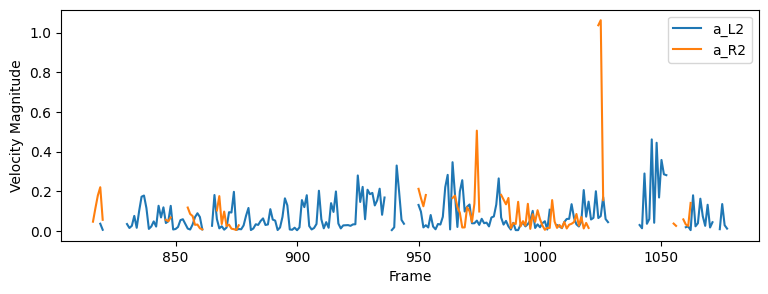

In [12]:
from scripts.tools.x_y_z_plot import KPPositionXYZ, KPVelocityXYZ, KPAccelerationXYZ, KPDisplaceMag, KPVelocityMag, \
    KPAccelerationMag, KPDisplaceXYZ

# KP = KPPosition(t.animal_list.animals[15], node=['a_L0', 'a_R0', 'neck'])
KP = KPVelocityMag(t.animal_list.animal('13'), node=['a_L2', 'a_R2'], filter_for_outlier=False
                       )

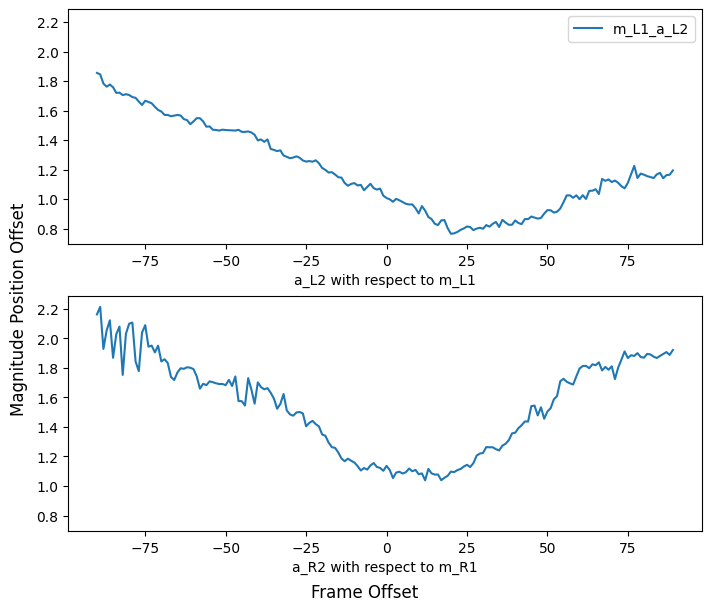

In [13]:
from scripts.tools.time_correlation import CorrelationPlot, OffsetPlot

plo = OffsetPlot(t.animal_list.animal('28'), [('m_L1', 'a_L2'), ('m_R1', 'a_R2')], (-90,90))

In [3]:
from scripts.tools.animal_dataframe import AnimalDataFrame
adf = AnimalDataFrame(t.animal_list.animal('track27'))

/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/filterpy/common/helpers.py:364: SyntaxWarning: invalid escape sequence '\S'
  """


In [4]:
position_df = adf.position_xyz(clean=True)

In [25]:
position_df.loc['a_R0'] - position_df.loc['a_L0']

,1503,1504,1505,1506,1508,1510,1511,1512,1513,1514,...,3962,3963,3964,3965,3966,3967,3968,3969,3970,3972
Axis,,,,,,,,,,,,,,,,,,,,,
x,0.469025,0.519866,0.480167,0.487865,0.465192,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,-0.485648,-0.517264,-0.485699,-0.533359,-0.523132,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,0.069876,0.124087,0.127697,0.103556,0.081451,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

from scripts.tools.animal_dataframe import AnimalDataFrame

adf = AnimalDataFrame(t.animal_list.animal('track27'))


/Users/persie/PycharmProjects/3d_ant_analysis/.venv/lib/python3.12/site-packages/filterpy/common/helpers.py:364: SyntaxWarning: invalid escape sequence '\S'
  """


In [4]:
keypoints_final = adf.post_process()

 Optimising Bone Length |█████████████▎⚠︎                         | (!) 815/2467 ████                                    | ▆▄▂ 243/2467 |████▊                                   | ▇▇▅ 295/2467 |██████▍                                 | ▂▂▄ 397/2467 |██████████▉                             | ▃▁▃ 668/2467 |███████████                             | ▂▄▆ 680/2467 


KeyboardInterrupt: 

In [5]:
keypoints_final.to_pickle('./post_process_session28_track27.pkl')

In [ ]:
import pandas as pd
keypoints_final = pd.read_pickle('./post_process_session28_track27.pkl')

In [6]:
animal_27 = t.animal_list.animal('track27')
animal_27.update_from_df(keypoints_final)

In [7]:
from src.visual_widget import MultiViewer
from src.animal import AnimalList
a_l = AnimalList([animal_27])
V = MultiViewer(a_l, t.obj_list, 0, fps=30, hold_window=20)

KeyboardInterrupt: 

In [1]:
from scripts.tools.ground_truth_toml_reader import GroundTruth

gt = GroundTruth(path="/Users/persie/PhD_Code/3d_ant_data_rle/", prefix="240905-1616", session_number=30)